<a href="https://colab.research.google.com/github/PuchToTalk/Ladybug_project/blob/master/Ladybugs_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Analysis & IA

Pour le 06 juin 2023

Réalisé par 



*   Paul CHU
*   Kylian GEOFFROY
*   Mouhamed SY





---



# **Contexte**

## 1. Introduction de la consigne

## 2. État de l'Art



---



# **Phase Training**

Début de l'exercice

## 0. Étude préliminaire (étude manuelle)

Création de notre propre DataFrame basé sur le comptage par l'oeil humain, et extraction manuelle.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import chi2_contingency


import numpy as np
from PIL import Image
import os
import cv2

In [73]:
df_manual = pd.read_csv("training_labels_with_points.csv", sep=";")
df_manual['Class'] = df_manual['Label'].apply(lambda x: 'Coccinella septempunctata' if x == 0 else 'Harmonia axyridis')
df_manual = df_manual.rename(columns={"spot_number": "Nbr_Spot"})

df_manual



,Image_id,Label,Nbr_Spot,Class
0,im-001,0,6,Coccinella septempunctata
1,im-002,0,7,Coccinella septempunctata
2,im-003,1,17,Harmonia axyridis
3,im-004,1,19,Harmonia axyridis
4,im-005,1,17,Harmonia axyridis
...,...,...,...,...
195,im-196,0,7,Coccinella septempunctata
196,im-197,1,3,Harmonia axyridis
197,im-198,0,4,Coccinella septempunctata
198,im-199,1,4,Harmonia axyridis


In [74]:
def int_Count(Nbr_Spot):
    if Nbr_Spot <= 2 :
        return "1-2" # catégorie de 
    elif (Nbr_Spot > 2) & (Nbr_Spot <= 6):
        return "3-6" # incertitude à l'oeil nu
    elif (Nbr_Spot == 7):
        return "7"
    elif (Nbr_Spot > 7):
        return "8+"
    else:
        return ""
 

In [75]:
df_manual['SpotInterval'] = df_manual['Nbr_Spot'].apply(int_Count)
df_manual

,Image_id,Label,Nbr_Spot,Class,SpotInterval
0,im-001,0,6,Coccinella septempunctata,3-6
1,im-002,0,7,Coccinella septempunctata,7
2,im-003,1,17,Harmonia axyridis,8+
3,im-004,1,19,Harmonia axyridis,8+
4,im-005,1,17,Harmonia axyridis,8+
...,...,...,...,...,...
195,im-196,0,7,Coccinella septempunctata,7
196,im-197,1,3,Harmonia axyridis,3-6
197,im-198,0,4,Coccinella septempunctata,3-6
198,im-199,1,4,Harmonia axyridis,3-6


In [76]:
df_color_manual = pd.read_csv("colorClassification.csv", sep=";")
df_color_manual = df_color_manual.drop(df_color_manual.columns[[0, 2, 3]], axis=1)
df_color_manual

,Image_id,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,Orange,Black,2,0
1,im-002,Orange,Black,2,0
2,im-003,Red,Black,1,0
3,im-004,Orange,Black,2,0
4,im-005,Red,Black,1,0
...,...,...,...,...,...
195,im-196,Red,Black,1,0
196,im-197,Black,Red,0,1
197,im-198,Red,Black,1,0
198,im-199,Black,Orange,0,2


In [77]:
df_final_manual = pd.merge(df_manual, df_color_manual, on=df_manual.columns[0])
df_final_manual

,Image_id,Label,Nbr_Spot,Class,SpotInterval,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,0,6,Coccinella septempunctata,3-6,Orange,Black,2,0
1,im-002,0,7,Coccinella septempunctata,7,Orange,Black,2,0
2,im-003,1,17,Harmonia axyridis,8+,Red,Black,1,0
3,im-004,1,19,Harmonia axyridis,8+,Orange,Black,2,0
4,im-005,1,17,Harmonia axyridis,8+,Red,Black,1,0
...,...,...,...,...,...,...,...,...,...
195,im-196,0,7,Coccinella septempunctata,7,Red,Black,1,0
196,im-197,1,3,Harmonia axyridis,3-6,Black,Red,0,1
197,im-198,0,4,Coccinella septempunctata,3-6,Red,Black,1,0
198,im-199,1,4,Harmonia axyridis,3-6,Black,Orange,0,2


In [78]:
df_final_manual.to_csv('df_manual.csv')

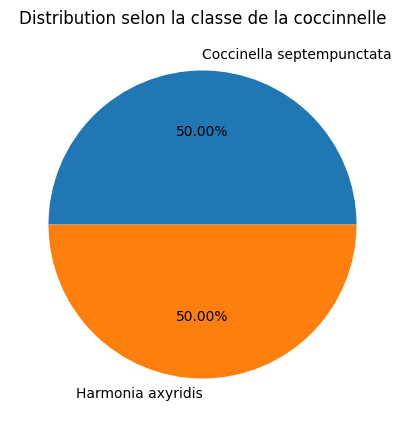

In [79]:
Class_nbr=df_final_manual['Class'].value_counts()
Class_nbr.plot.pie(y='Class', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la classe de la coccinnelle')
plt.show()

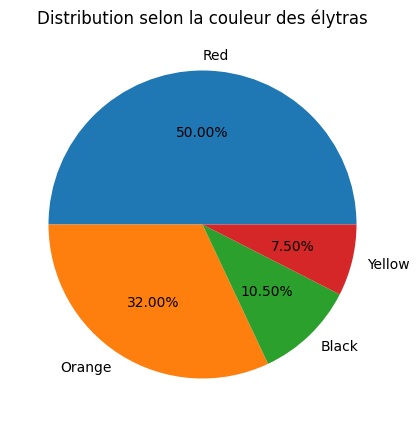

In [80]:
Elytra_color=df_final_manual['ElytraColor'].value_counts()
Elytra_color.plot.pie(y='ElytraColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des élytras')
plt.show()

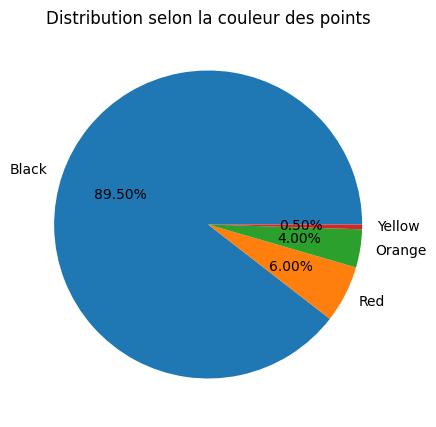

In [81]:
Spot_color=df_final_manual['SpotColor'].value_counts()
Spot_color.plot.pie(y='SpotColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des points')
plt.show()

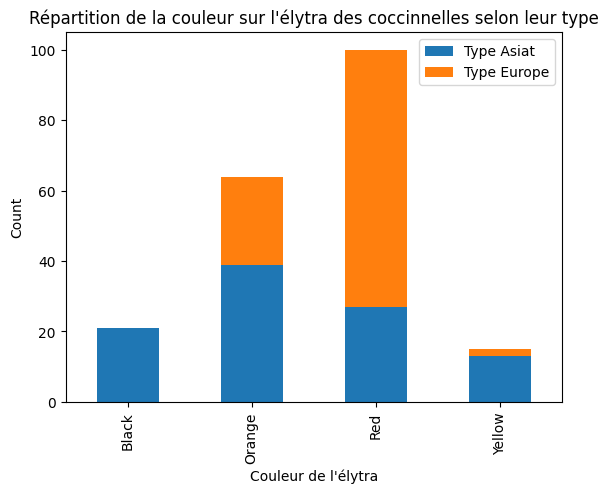

In [82]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = df_final_manual[df_final_manual['Label'] == 1]['ElytraColor'].value_counts()
Europe = df_final_manual[df_final_manual['Label'] == 0]['ElytraColor'].value_counts()
elytra_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
elytra_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur sur l'élytra des coccinnelles selon leur type")
plt.xlabel("Couleur de l'élytra")
plt.ylabel("Count")
plt.show()


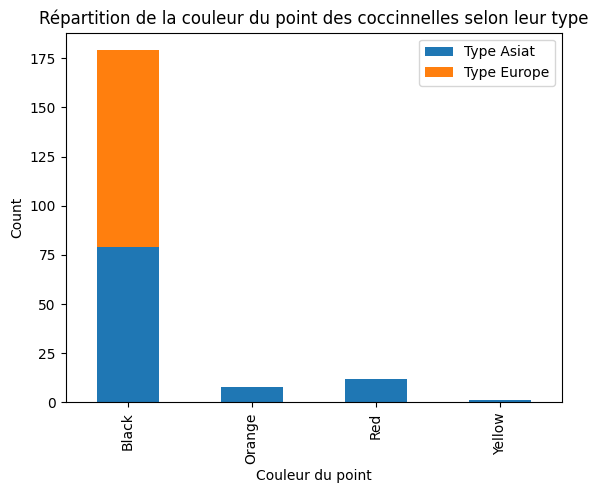

In [83]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = df_final_manual[df_final_manual['Label'] == 1]['SpotColor'].value_counts()
Europe = df_final_manual[df_final_manual['Label'] == 0]['SpotColor'].value_counts()
spot_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
spot_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur du point des coccinnelles selon leur type")
plt.xlabel("Couleur du point")
plt.ylabel("Count")
plt.show()


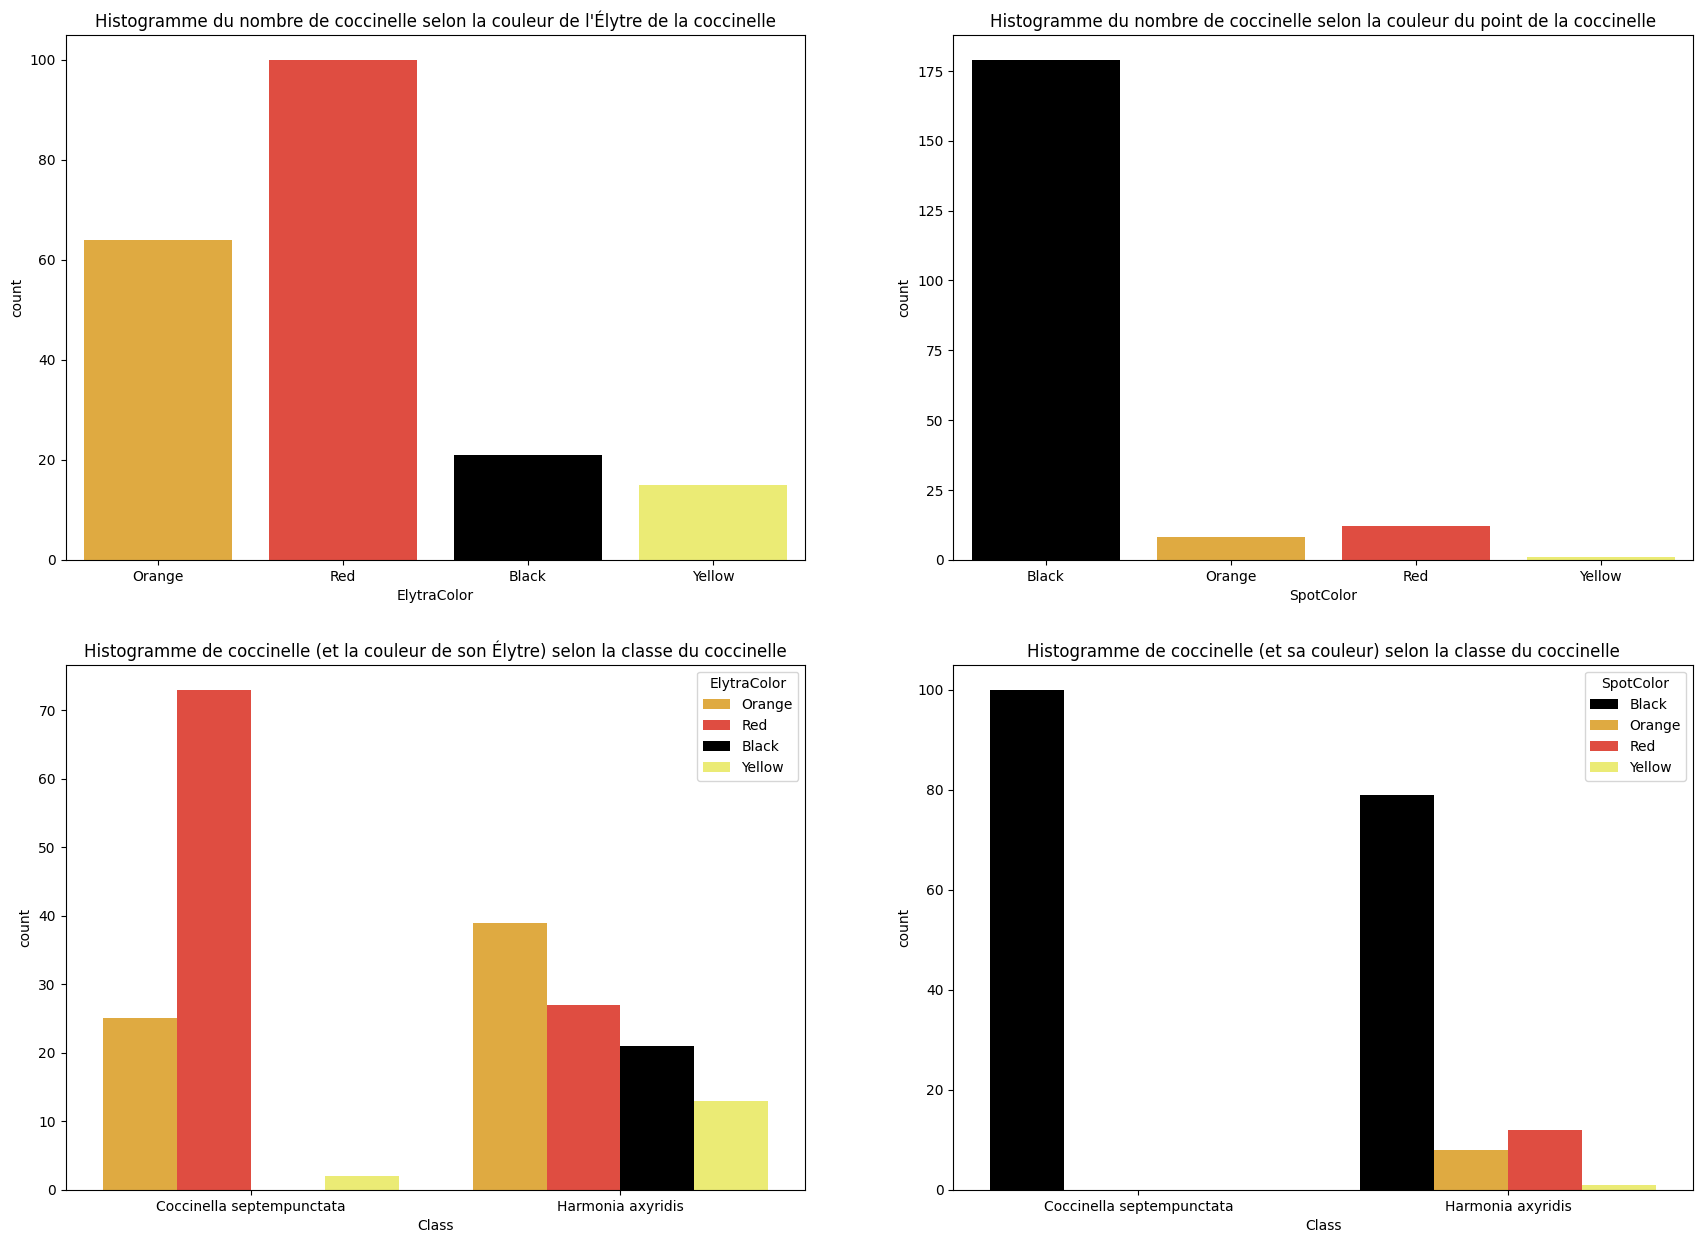

In [84]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.countplot(data=df_final_manual, ax=axes[0][0], x="ElytraColor",palette=palette ).set(title="Histogramme du nombre de coccinelle selon la couleur de l'Élytre de la coccinelle")
sns.countplot(data=df_final_manual, ax=axes[0][1], x="SpotColor", palette=palette).set(title='Histogramme du nombre de coccinelle selon la couleur du point de la coccinelle')
sns.countplot(data=df_final_manual, ax=axes[1][0], x="Class", hue = "ElytraColor", palette=palette).set(title='Histogramme de coccinelle (et la couleur de son Élytre) selon la classe du coccinelle')
sns.countplot(data=df_final_manual, ax=axes[1][1], x="Class",hue = "SpotColor", palette = palette).set(title='Histogramme de coccinelle (et sa couleur) selon la classe du coccinelle')






plt.show()

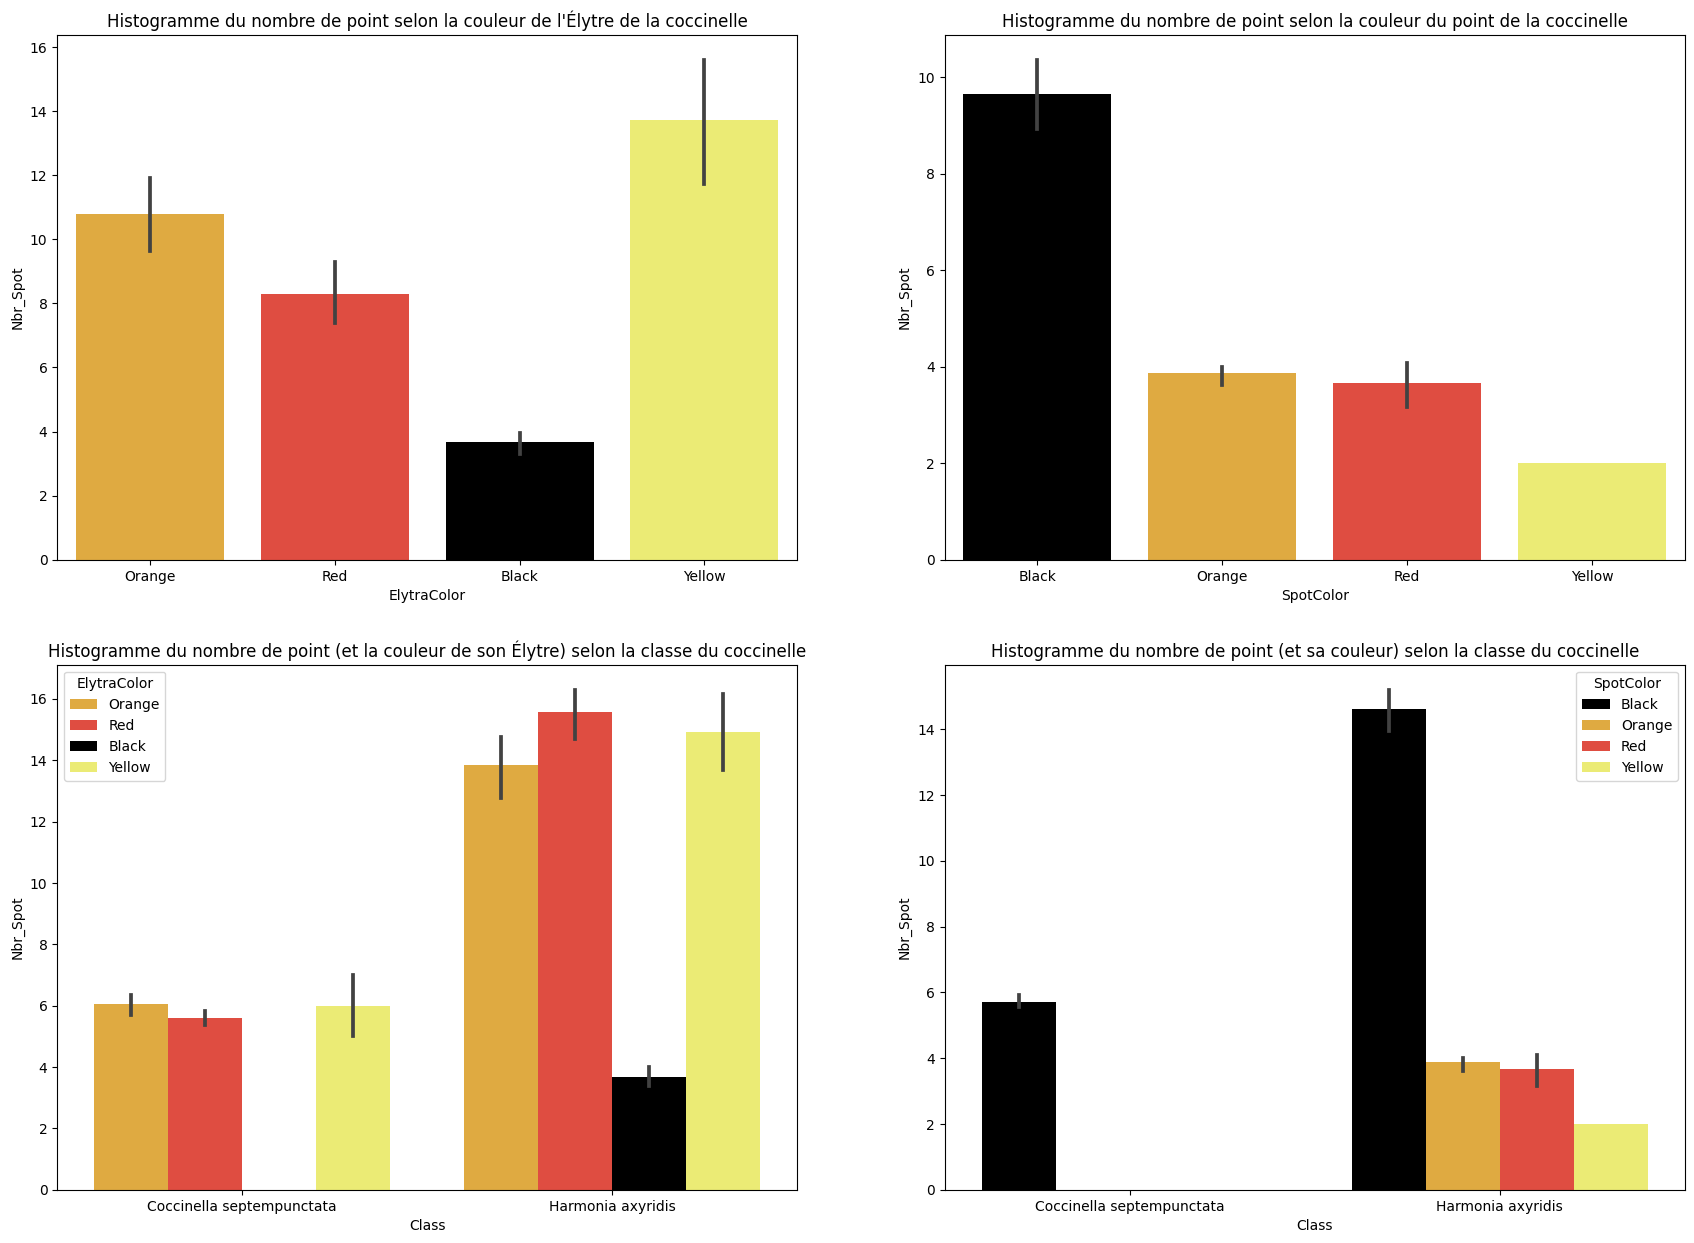

In [85]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.barplot(data=df_final_manual, ax=axes[0][0], x="ElytraColor", y="Nbr_Spot" ,palette=palette).set(title="Histogramme du nombre de point selon la couleur de l'Élytre de la coccinelle")
sns.barplot(data=df_final_manual, ax=axes[0][1], x="SpotColor", y="Nbr_Spot", palette=palette).set(title='Histogramme du nombre de point selon la couleur du point de la coccinelle')
sns.barplot(data=df_final_manual, ax=axes[1][0], x="Class", y="Nbr_Spot", hue = "ElytraColor", palette=palette).set(title='Histogramme du nombre de point (et la couleur de son Élytre) selon la classe du coccinelle')
sns.barplot(data=df_final_manual, ax=axes[1][1], x="Class", y="Nbr_Spot", hue = "SpotColor", palette = palette).set(title='Histogramme du nombre de point (et sa couleur) selon la classe du coccinelle')






plt.show()

Partie analyse des corrélations

In [86]:
def degree_of_freedom (df):
    degf2 = (df.shape[0] - 1 ) * (df.shape[1] - 1)
    return degf2
    
def cramer_v(df):
    n = df.sum().sum()
    chi2 = chi2_contingency(df, correction = False)[0]
    res = np.sqrt(chi2 / (n*(min(df.shape)-1)))
    return res


In [87]:

df_crosstab1 = pd.crosstab(df_final_manual['SpotInterval'], df_final_manual['Class'], rownames = ['Number of Spot'], colnames = ['Class'])



print(f"Il y a un total de {degree_of_freedom(df_crosstab1)} degrés de liberté")
df_crosstab1

Il y a un total de 3 degrés de liberté


Class,Coccinella septempunctata,Harmonia axyridis
Number of Spot,,
1-2,0,4
3-6,72,18
7,28,1
8+,0,77


In [88]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab1)}")
    

Chi2 est égale à 138.53793103448277 
p-value : 7.810817742335135e-30 
Le coefficient de Cramer donne 0.8322797938027895


__Remarque__ : On rejète dans un premier temps l'hypothèse H0, on en déduit que les variables (Classe de la coccinelle et le nombre de point) ne sont pas indépendantes. De plus, comme le coefficient de Cramer est très important. On en conclut qu'il existe une relation de corrélation très significative entre les deux variables. Et qu'il sera possible de prédire l'une des variables par rapport à l'autre.

In [89]:

df_crosstab2 = pd.crosstab(df_final_manual['ElytraColor'], df_final_manual['Class'], rownames = ['ElytraColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab2)} degrés de liberté")
df_crosstab2

Il y a un total de 3 degrés de liberté


Class,Coccinella septempunctata,Harmonia axyridis
ElytraColor,,
Black,0,21
Orange,25,39
Red,73,27
Yellow,2,13


In [90]:

chi2, p, degf, ex = chi2_contingency(df_crosstab2)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab2)}")
    

Chi2 est égale à 53.28916666666667 
p-value : 1.5907277768164958e-11 
Le coefficient de Cramer donne 0.5161839142527916


__Remarque__ : On rejète également l'hypothèse H0. On en déduit que la classe de la coccinelle et que la couleur des Élytres ne sont pas indépendantes. Par ailleurs, la coefficient de Cramer étant supérieur à 0.5. On peut considérer la relation de corrélation comme étant significatif également.

In [91]:

df_crosstab3 = pd.crosstab(df_final_manual['SpotColor'], df_final_manual['Class'], rownames = ['SpotColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab3)} degrés de liberté")
df_crosstab3

Il y a un total de 3 degrés de liberté


Class,Coccinella septempunctata,Harmonia axyridis
SpotColor,,
Black,100,79
Orange,0,8
Red,0,12
Yellow,0,1


In [92]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab3)}")
    

Chi2 est égale à 138.53793103448277 
p-value : 7.810817742335135e-30 
Le coefficient de Cramer donne 0.34251778896020857


__Remarque__ : Ici l'hypothèse H0 est également rejeté. On en déduit que les variables "*SpotColor*" et "*Class*" ne sont pas indépendantes. Cela dit, étant donné que le coefficient de Cramer est inférieur à 0.5. Ainsi on ne peut pas évoquer de relation de corrélation entre ces deux variables, contrairement aux 2 cas précédents.



---



## 1. Comptage des points

On prend en entrée les images segmentées => renvoie en sortie une liste "*SpotCounting*", et d’une liste "*IndiceCircularité*" (optionnel)

## 2. Extraction de features (Couleur de l'Élytre, couleur du point)

On détermine la couleur de la carapace & du point : prend en entrée les images segmentées & images colorées => renvoie en sortie une liste "*ElytraColor*" contenant la couleur de la carapace, puis d’une liste "*SpotColor*" pour la couleur du point.

## 3. Data Exploration

Construire un Dataframe avec notamment comme colonnes : "*Image_ID", "SpotCounting", "ElytraColor", "SpotColor*"


Data exploration (corrélation entre les features, Data visualisation)

## 4. Algorithme pour la classification

Appliquer notre algo pour déterminer la classe : application d’un arbre décisionnel en fonction de nos Features de chaque image => résultant à une colonne "*Label*" (qui renvoie 0: Europe 1 : Asiatique)

## 5. Récupération du CSV final

CSV type, Comparaison avec le DataFrame manuel

## 6. Évaluation de notre modèle

Entraînement de notre modèle ML & afficher les performances du modèle (Accuracy, F1 score, …)



---



# **Phase Test**

## Comptage du nombre de point

## Classification

## Performance finale



---



# **BONUS :** Une nouvelle approche (Deep Learning)